In [175]:
import pandas as pd
import numpy as np
from plotnine import *
from math import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt


### Reading in Data and converting to CSV

In [176]:
df = pd.read_csv("2020-XTern-DS.csv")

# 1. Word Cloud of Cuisine Categories 

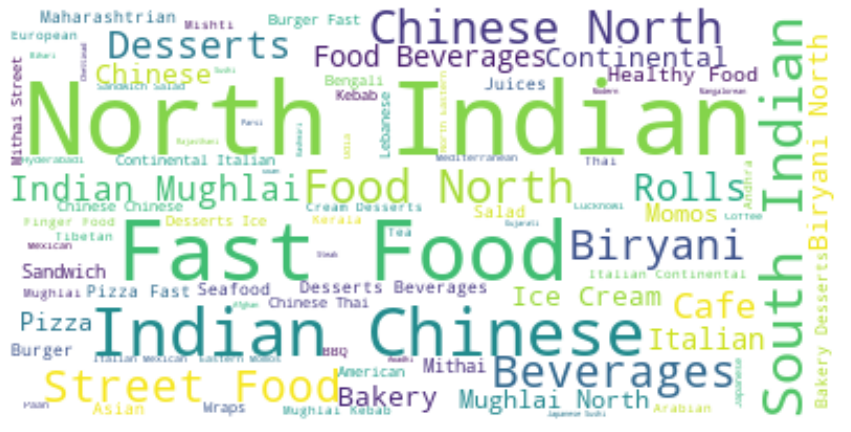

In [177]:
category_list = ""

main_cat_list = df['Cuisines'].tolist()
for cat_lis in main_cat_list:
    temp_ls = cat_lis.split(", ")
    for word in temp_ls:
#         if word not in category_list:
            category_list = category_list + word + " "
            


wordcloud = WordCloud(background_color="white")
wordcloud.generate(category_list)
plt.figure(figsize = [15,15])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()
            


# 2. Correlation between Average Cost and Number of Reviews

### Do places with a lower average cost pull in more customers and hence more reviews?

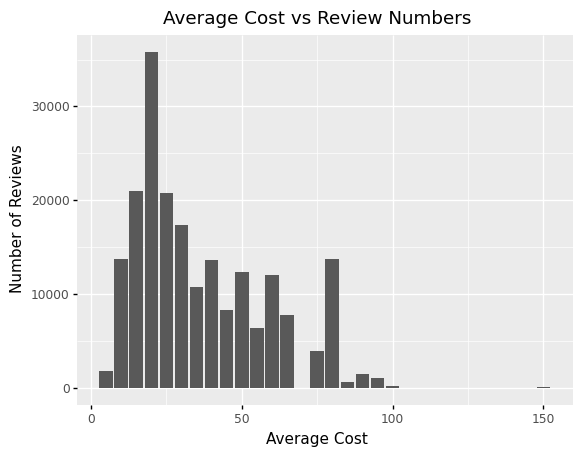

<ggplot: (8788904494683)>

In [228]:
rating_vs_reviews = df.loc[:, ['Average_Cost', 'Reviews']]
rating_vs_reviews['Average_Cost'] = rating_vs_reviews['Average_Cost'].astype(str).str[1:]

rating_vs_reviews = rating_vs_reviews[pd.to_numeric(rating_vs_reviews['Average_Cost'], errors='coerce').notnull()]
rating_vs_reviews = rating_vs_reviews[pd.to_numeric(rating_vs_reviews['Reviews'], errors='coerce').notnull()]
rating_vs_reviews['Reviews'] = rating_vs_reviews['Reviews'].astype(int)
rating_vs_reviews['Average_Cost'] = rating_vs_reviews['Average_Cost'].astype(float)


p = ggplot(rating_vs_reviews, aes(x = 'Average_Cost', y = 'Reviews')) 
p = p + geom_bar(stat = "identity")
p = p + labs(x = "Average Cost", y = "Number of Reviews", title = "Average Cost vs Review Numbers")
p

## RESULT:
### It seems like place with lower average cost **do** pull in more customers which can be seen since they have a higher number of reviews compared to ones with higher average cost 

# 3. Cuisines with Highest and Lowest Ratings 

In [271]:
cuisines_by_rating = df.loc[:, ['Cuisines', 'Rating']]

cuisines_by_rating = cuisines_by_rating[pd.to_numeric(cuisines_by_rating['Rating'], errors='coerce').notnull()]
cuisines_by_rating['Average Rating'] = cuisines_by_rating['Rating'].astype(float)


cuisines_by_rating = cuisines_by_rating.groupby(['Cuisines']).mean()
cuisines_by_rating.reset_index()


# li = cuisines_by_rating.reset_index()['Cuisines']
# cuisines_by_rating['Category'] = cuisines_by_rating['Cuisines']


,Cuisines,Average Rating
0,"Afghan, BBQ, Biryani, Seafood",3.500000
1,American,3.800000
2,"American, Fast Food",3.850000
3,"American, Italian, Cafe, Salad",4.200000
4,"American, Italian, Continental, Burger, Sandwich",3.400000
...,...,...
649,"Thai, Salad, Seafood",4.100000
650,Tibetan,3.566667
651,"Tibetan, Chinese, Momos",4.200000
652,"Wraps, Healthy Food, Sandwich, Salad",3.800000


# Highest 

In [192]:
cuisines_by_rating.nlargest(10, ['Average Rating'])

,Average Rating
Cuisines,
"North Indian, Mughlai, Biryani, Rolls, Momos",4.8
"Asian, Burmese, Bubble Tea, Desserts, Salad, Tea, Beverages, Ice Cream",4.7
"Biryani, North Indian, Mughlai, Kebab, Rolls",4.7
"Chinese, Cantonese",4.7
"Continental, North Indian, BBQ, Steak",4.7
"Fast Food, Healthy Food",4.7
"Italian, Continental, Chinese, Mexican, Fast Food, Street Food, Desserts",4.7
"North Indian, Chinese, Kebab, Mughlai",4.7
"Asian, Continental, North Indian",4.6


# Lowest

In [182]:
cuisines_by_rating.nsmallest(10, ['Average Rating'])

,Average Rating
Cuisines,
"Fast Food, Chinese, South Indian",2.5
"North Indian, Bengali, Chinese, Odia",2.6
"Biryani, Hyderabadi, North Indian, Mughlai",2.7
"Fast Food, North Eastern, Momos",2.7
"Pizza, Fast Food, Italian",2.7
"South Indian, North Indian, Fast Food, Chinese",2.7
"Chinese, North Indian, Fast Food, Biryani",2.8
"Chinese, North Indian, Rolls, Momos",2.8
"Continental, Juices, American, Fast Food, Italian, Ice Cream",2.8


# 4. Cook Time and Rating 

### Does cook time of a place impact the ratings it gets in any way? Do people get frustrated and leave bad ratings if the cook time is longer that usual?

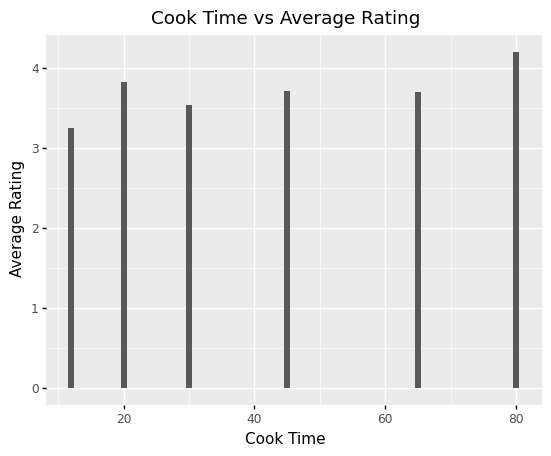

<ggplot: (8788875776130)>

In [288]:
time_vs_ratings = df.loc[:, ['Cook_Time', 'Rating']]
time_vs_ratings['Cook_Time'] = time_vs_ratings['Cook_Time'].astype(str).str[:2]


time_vs_ratings = time_vs_ratings[pd.to_numeric(time_vs_ratings['Cook_Time'], errors='coerce').notnull()]
time_vs_ratings = time_vs_ratings[pd.to_numeric(time_vs_ratings['Rating'], errors='coerce').notnull()]
time_vs_ratings['Cook_Time'] = time_vs_ratings['Cook_Time'].astype(int)
time_vs_ratings['Rating'] = time_vs_ratings['Rating'].astype(float)

grouped = time_vs_ratings.groupby(['Cook_Time']).mean()

lis = grouped.reset_index()['Cook_Time'].tolist()

grouped['Time'] = lis



grouped = grouped.reset_index()

grouped = grouped.loc[:, ['Time', 'Rating']]

grouped


p = ggplot(grouped, aes(x = 'Time', y = 'Rating')) 
p = p + geom_bar(stat = "identity")
p = p + labs(x = "Cook Time", y = "Average Rating", title = "Cook Time vs Average Rating")
p


## RESULT:
### It seems to me that the cook time of a place does not impact the ratings of it in any way

# 5. Center Location 

### Finding center location given list of coordinates 

In [289]:
lat = df.Latitude.tolist()
long = df.Longitude.tolist()

loc = []

for i in range(len(lat)):
    lis = []
    lis.append(lat[i])
    lis.append(long[i])
    loc.append(lis)

x = 0
y = 0
z = 0

for lat, lon in loc:
        lat = float(lat)
        lon = float(lon)
        x += cos(lat) * cos(lon)
        y += cos(lat) * sin(lon)
        z += sin(lat)

x = float(x / len(loc))
y = float(y / len(loc))
z = float(z / len(loc))

print(atan2(z, sqrt(x * x + y * y)), atan2(y, x))



1.350815506320228 -0.6797480593369534
